# Introduction

1. Context
* Industry: Telecommunications
* Key Area: Customer Churn (also known as customer attrition)
* Objective: Understanding why customers leave and predicting which customers are at risk of leaving.
2. Problem Statement <br>
In the competitive telecom industry, retaining existing customers is often more cost-effective than acquiring new ones.<br>
High churn rates can indicate dissatisfaction with service, pricing, or other factors.
Reducing churn can lead to significant cost savings and revenue retention for the company.
3. Goals
* Primary Goal: Develop a machine learning model to predict the likelihood of a customer churning.
* Secondary Goals:
Identify key factors that contribute to customer churn.
Provide actionable insights for reducing churn rates.
4. Analytics Approach
* Data Exploration: Understand the dataset, including feature distribution and missing values.
* Feature Engineering: Create new features that might help in predicting churn.
* Model Selection: Test various classification algorithms (like Logistic Regression, Random Forest, Gradient Boosting, etc.).
* Model Validation: Use techniques like cross-validation to assess model performance.
* Hyperparameter Tuning: Fine-tune the model for optimal performance.
5. Metric Evaluation
* Accuracy: Overall correctness of the model.
* Precision and Recall: Particularly important if the cost of false positives/negatives is high.
* F1 Score: A balance between Precision and Recall.
* AUC-ROC: Measure of the ability of a classifier to distinguish between classes.
* Confusion Matrix: For a detailed understanding of model performance.
6. Project Limitation
* Data Limitations: Quality and quantity of data, presence of biases.
* Model Interpretability: Some models may offer high accuracy but low interpretability.
* Changing Patterns: Customer behavior can change over time, affecting model accuracy.
* Implementation Challenges: Integrating the model into existing systems.

###
| Column Name       | Type    | Description                                         |
|-------------------|---------|-----------------------------------------------------|
| Dependents        | Object  | Indicates whether the customer has dependents ('Yes' or 'No'). |
| Tenure            | Integer | Number of months the customer has been with the company. |
| OnlineSecurity    | Object  | Whether the customer uses Online Security service ('Yes', 'No', 'No internet service'). |
| OnlineBackup      | Object  | Whether the customer uses Online Backup service ('Yes', 'No', 'No internet service'). |
| InternetService   | Object  | Type of internet service (DSL, Fiber optic, or No). |
| DeviceProtection  | Object  | Whether the customer has Device Protection service ('Yes', 'No', 'No internet service'). |
| TechSupport       | Object  | Whether the customer uses Tech Support services ('Yes', 'No', 'No internet service'). |
| Contract          | Object  | Contract term of the customer (Month-to-month, One year, Two year). |
| PaperlessBilling  | Object  | Whether the customer has paperless billing ('Yes' or 'No'). |
| MonthlyCharges    | Float   | Amount charged to the customer each month. |
| Churn             | Object  | Whether the customer has left within the last month ('Yes' or 'No'). |


# Data Understanding

In [185]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.model_selection import train_test_split
from pycaret.classification import *
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline



# Load the dataset
df = pd.read_csv('data_telco_customer_churn.csv')

# Display basic information about the dataset
df


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [187]:
# Count the number of 'Churn'
print(df['Churn'].value_counts())

# Calculate the percentage of churn
print(df['Churn'].value_counts() / len(df))


Churn
No     3614
Yes    1316
Name: count, dtype: int64
Churn
No     0.733063
Yes    0.266937
Name: count, dtype: float64


In [188]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


Columns and Their Business Context<br>
* Dependents: Whether the customer has dependents (Yes/No). This can affect customer loyalty and churn, as those with dependents may have different priorities or financial considerations.
* Tenure: Duration (in months) a customer has been with the company. Longer tenure might indicate higher loyalty.
* OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport: Services subscribed by the customer (Yes/No/No internet service). These value-added services can impact customer satisfaction and retention.
* InternetService: Type of internet service (DSL, Fiber optic, No). Different types of services can affect customer experience and churn.
* Contract: Type of customer contract (Month-to-month, One year, Two year). Longer contracts might indicate a lower likelihood of churn.
* PaperlessBilling: Whether the customer uses paperless billing (Yes/No). This could correlate with customer’s tech-savviness or environmental consciousness.
* MonthlyCharges: The amount charged to the customer monthly. Higher charges might lead to higher churn.
* Churn: Customer churn status (Yes/No). This is the target variable for prediction.

In [189]:
# Filtering out numerical columns
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Generating descriptive statistics
descriptive_statistics = numerical_data.describe()
descriptive_statistics

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


In [190]:
from sklearn.model_selection import train_test_split
# split seen unseen
data, dataunseen = train_test_split(df, test_size=0.2, random_state=42)

In [191]:
data.shape

(3944, 11)

In [192]:
dataunseen.shape

(986, 11)

# EDA - Exploratory Data Analysis

In [193]:
# mengambil nama kolom kategorikal
cat_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
cat_features

['Dependents',
 'OnlineSecurity',
 'OnlineBackup',
 'InternetService',
 'DeviceProtection',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'Churn']

In [194]:
pd.DataFrame({
    'feature'           : data.columns.values,
    'data_type'         : data.dtypes.values,
    'null_value(%)'     : data.isna().mean().values * 100,
    'n_unique'          : data.nunique().values,
    'duplicate'         : data.duplicated().sum(),
    'Negative_value_num': [len(data[col][data[col] < 0])/ len(data) * 100 if col in data.select_dtypes(include=np.number).columns else 0 for col in data.columns],
    'Zero_value_num'    : [len(data[col][data[col] == 0])/ len(data) * 100 if col in data.select_dtypes(include=np.number).columns else 0 for col in data.columns],
    'Zero_value_obj'    : [len(data[col][data[col] == ''])/ len(data) * 100 if col in data.select_dtypes(include=np.object_).columns else 0 for col in data.columns],
    'sample_unique'     : [data[col].unique() for col in data.columns]}
).round(3)

,feature,data_type,null_value(%),n_unique,duplicate,Negative_value_num,Zero_value_num,Zero_value_obj,sample_unique
0,Dependents,object,0.0,2,55,0.0,0.000,0.0,"[No, Yes]"
1,tenure,int64,0.0,73,55,0.0,0.177,0.0,"[13, 44, 15, 43, 30, 22, 48, 64, 3, 20, 71, 34..."
2,OnlineSecurity,object,0.0,3,55,0.0,0.000,0.0,"[Yes, No internet service, No]"
3,OnlineBackup,object,0.0,3,55,0.0,0.000,0.0,"[No, No internet service, Yes]"
4,InternetService,object,0.0,3,55,0.0,0.000,0.0,"[DSL, No, Fiber optic]"
5,DeviceProtection,object,0.0,3,55,0.0,0.000,0.0,"[No, No internet service, Yes]"
6,TechSupport,object,0.0,3,55,0.0,0.000,0.0,"[Yes, No internet service, No]"
7,Contract,object,0.0,3,55,0.0,0.000,0.0,"[One year, Month-to-month, Two year]"
8,PaperlessBilling,object,0.0,2,55,0.0,0.000,0.0,"[No, Yes]"
9,MonthlyCharges,float64,0.0,1313,55,0.0,0.000,0.0,"[55.15, 20.5, 51.1, 94.3, 100.45, 100.65, 108...."


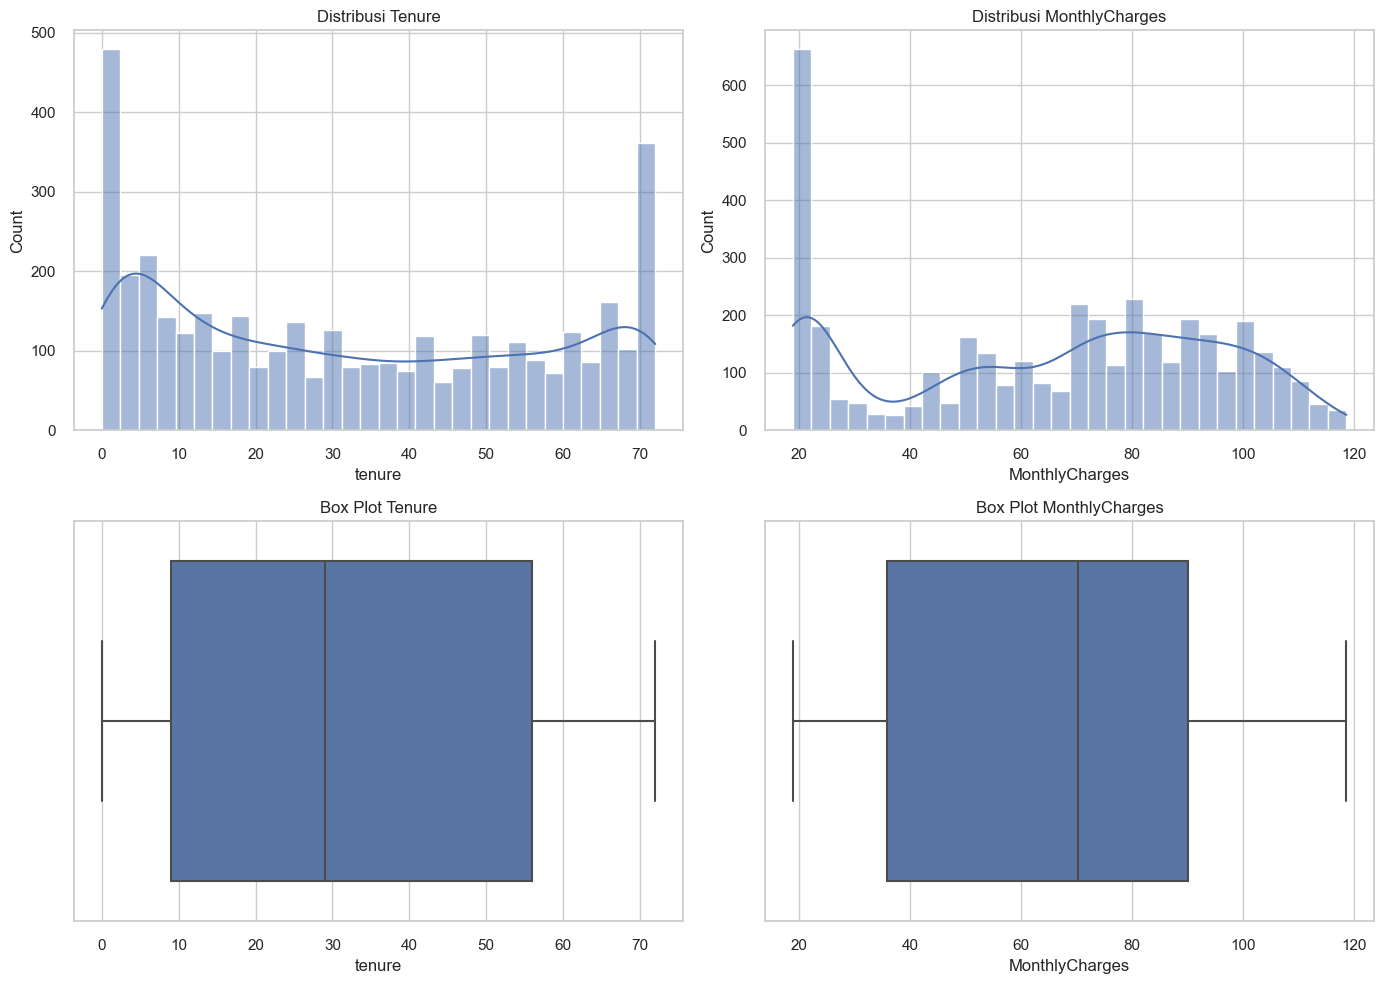

In [195]:
# Mengatur gaya plot
sns.set(style="whitegrid")

# Membuat histogram dan box plot untuk variabel numerik
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Histogram untuk 'Tenure'
sns.histplot(data['tenure'], bins=30, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Distribusi Tenure')

# Box plot untuk 'Tenure'
sns.boxplot(x=data['tenure'], ax=ax[1, 0])
ax[1, 0].set_title('Box Plot Tenure')

# Histogram untuk 'MonthlyCharges'
sns.histplot(data['MonthlyCharges'], bins=30, kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Distribusi MonthlyCharges')

# Box plot untuk 'MonthlyCharges'
sns.boxplot(x=data['MonthlyCharges'], ax=ax[1, 1])
ax[1, 1].set_title('Box Plot MonthlyCharges')

plt.tight_layout()
plt.show()


### Numerical Variables: 'Tenure' and 'MonthlyCharges'
* Tenure (Duration of Subscription)

The histogram shows a fairly uniform distribution across the tenure range, with peaks at the beginning (new customers) and at the end (long-term customers).<br>
The box plot indicates that the median tenure is around the middle of the range, without significant outliers.<br>
* MonthlyCharges (Monthly Fees)

The histogram shows a more varied distribution. There is a concentration of customers with lower monthly fees and another peak at higher fees, indicating different groups of customers with different service packages.<br>
The box plot shows a slightly higher median, and there are no clear outliers.

In [196]:
# Numerical Features
num_feature = [feature for feature in df.describe().columns]
num_feature

['tenure', 'MonthlyCharges']

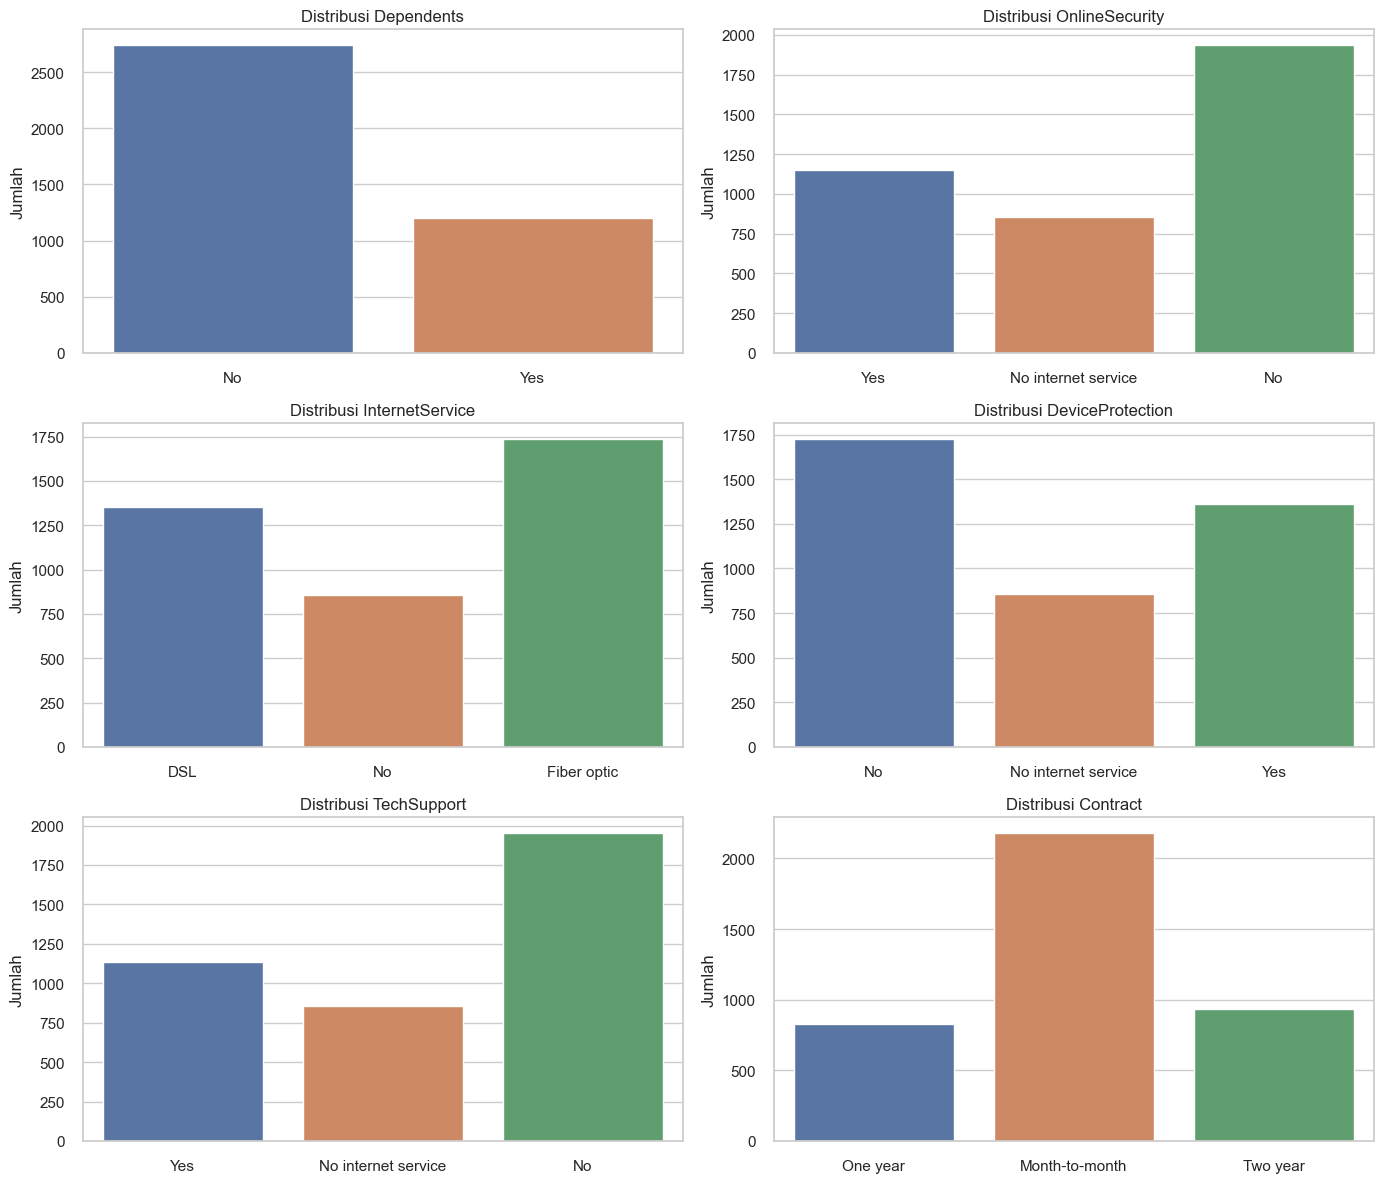

In [197]:
# Membuat count plot untuk beberapa variabel kategorikal
fig, ax = plt.subplots(3, 2, figsize=(14, 12))

# Variabel kategorikal untuk diplot
categorical_vars = ['Dependents', 'OnlineSecurity', 'InternetService', 'DeviceProtection', 'TechSupport', 'Contract']

for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=data, ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(f'Distribusi {var}')
    ax[i//2, i%2].set_xlabel('')
    ax[i//2, i%2].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

### Categorical Variables: 'Dependents', 'OnlineSecurity', 'InternetService', and others
* Dependents: There are more customers without dependents than with dependents.
* OnlineSecurity: Most customers either do not have online security services or do not have internet service. Only a small proportion have online security services.
* InternetService: A large number of customers use Fiber optic services, followed by DSL. There's also a significant number of customers without internet service.
* DeviceProtection: The distribution is similar to OnlineSecurity, where most customers either do not have device protection or do not have internet service.
* TechSupport: Most customers do not have technical support, with a smaller number having this service.
* Contract: The majority of customers are in month-to-month contracts, with fewer in one-year or two-year contracts.

In [198]:
# mengambil nama kolom kategorikal
cat_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
cat_features

['Dependents',
 'OnlineSecurity',
 'OnlineBackup',
 'InternetService',
 'DeviceProtection',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'Churn']

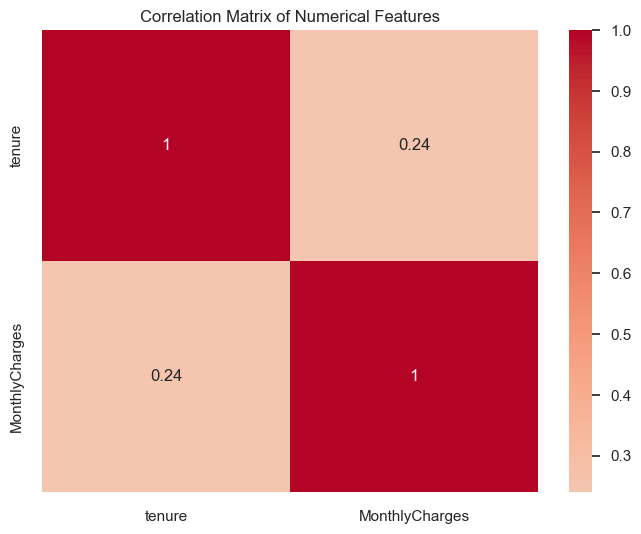

,tenure,MonthlyCharges
tenure,1.000000,0.240244
MonthlyCharges,0.240244,1.000000


In [199]:
# Menghitung korelasi antar variabel numerik
correlation_matrix = numerical_data.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

correlation_matrix


The correlation coefficient between 'Tenure' and 'MonthlyCharges' is relatively low, indicating that there is not a strong linear relationship between these two variables. This suggests that the duration of a customer's subscription (tenure) does not necessarily predict the amount they are charged each month.

# <strong> Data Preparation

## Missing Value

In [200]:
# Check for missing values
missing_values = data.isnull().sum()

# Display missing values if any
missing_values[missing_values > 0]

Series([], dtype: int64)

Overall, the lack of missing values is a positive indicator of the dataset's quality and simplifies the process of data analysis and subsequent machine learning.

## Duplicated Data

In [201]:
# Check for duplicated rows
duplicated_data = data.duplicated().sum()
duplicated_data

55

Since there are 55 duplicated values, we will drop all of the duplicated values.

In [202]:
data_cleaned = data.drop_duplicates(keep='first')
data_cleaned.duplicated().sum()

0

In [203]:
data_cleaned.shape

(3889, 11)

## Outliers

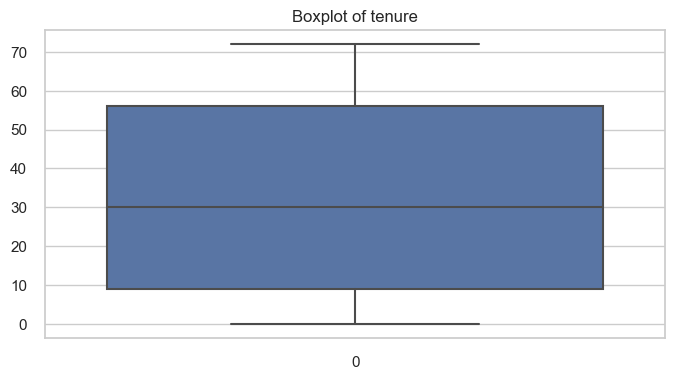

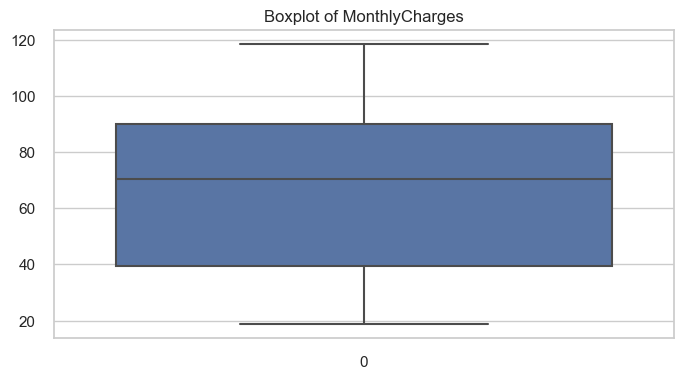

In [204]:
for feature in ['tenure', 'MonthlyCharges']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data_cleaned[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [205]:
# Function to detect outliers using IQR
def detect_outliers(data_cleaned, features):
    outlier_indices = []

    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(data[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(data[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # Determine outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = data_cleaned[(data_cleaned[col] < Q1 - outlier_step) | (data_cleaned[col] > Q3 + outlier_step)].index

        # Append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # Select observations containing more than one outlier
    outlier_indices = list(set(outlier_indices))
    return outlier_indices

# Checking for outliers in the numerical columns
outlier_indices = detect_outliers(data_cleaned, num_feature)

# Insights from the outliers
outlier_insights = {
    "Number of Outliers": len(outlier_indices),
    "Percentage of Outliers": (len(outlier_indices) / len(data_cleaned)) * 100,
    "Outliers Impact": "May skew the results" if len(outlier_indices) > 0 else "No significant impact from outliers"
}

outlier_insights



{'Number of Outliers': 0,
 'Percentage of Outliers': 0.0,
 'Outliers Impact': 'No significant impact from outliers'}

Since there are no outliers, there is no significant impact from outliers on the dataset. This means the data is relatively uniform and does not contain extreme values that could skew analysis results.

## Cardinality

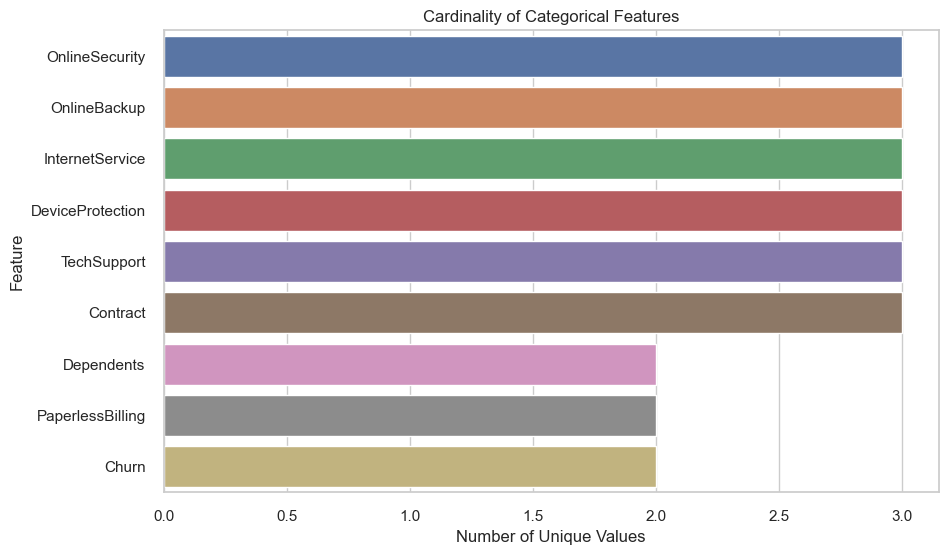

,Feature,Cardinality
1,OnlineSecurity,3
2,OnlineBackup,3
3,InternetService,3
4,DeviceProtection,3
5,TechSupport,3
6,Contract,3
0,Dependents,2
7,PaperlessBilling,2
8,Churn,2


In [206]:
# Calculating the cardinality (number of unique values) for each categorical feature
cardinality = {col: data_cleaned[col].nunique() for col in data_cleaned.columns if data_cleaned[col].dtype == 'object'}

# Converting the cardinality dictionary to a DataFrame for visualization
cardinality_df = pd.DataFrame(list(cardinality.items()), columns=['Feature', 'Cardinality']).sort_values(by='Cardinality', ascending=False)

# Visualizing the cardinality
plt.figure(figsize=(10, 6))
sns.barplot(x='Cardinality', y='Feature', data=cardinality_df)
plt.title('Cardinality of Categorical Features')
plt.xlabel('Number of Unique Values')
plt.ylabel('Feature')
plt.show()

cardinality_df

* This low level of cardinality is beneficial for modeling because it does not add unnecessary complexity. Features with few unique categories are easier to encode and interpret in the model.
* There are no categorical features with very high cardinality, so there is no need for special cardinality reduction techniques such as binning or grouping.
* Dengan kardinalitas yang relatif rendah, teknik encoding standar seperti one-hot encoding atau label encoding dapat digunakan secara efektif tanpa khawatir meningkatkan dimensi fitur secara signifikan.
* Overall, the low cardinality of these features suggests that this dataset is clean enough for analysis and modeling, without requiring the special handling associated with high cardinality. This facilitates the modeling process and interpretation of the results.

# Rare Labels

In [207]:
import tabulate 

# Identifying categorical columns from 'data_cleaned'
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns.tolist()

# Calculating frequency distribution for each categorical variable in percentage
label_frequency_percent = {col: data_cleaned[col].value_counts(normalize=True) * 100 for col in categorical_columns}

# Creating a nested list for use with tabulate
data_for_tabulate = []

# Filling data for tabulate
for variable, freq_series in label_frequency_percent.items():
    data_for_tabulate.append([variable, freq_series.index[0], f"{freq_series.iloc[0]:.2f}%"])
    for idx in range(1, len(freq_series)):
        data_for_tabulate.append(["", freq_series.index[idx], f"{freq_series.iloc[idx]:.2f}%"])

# Displaying frequency distribution in percentage using tabulate
tabulate_data = tabulate.tabulate(data_for_tabulate, headers=["Variable", "Category", "Frequency (%)"], tablefmt="pipe")
print(tabulate_data)


| Variable         | Category            | Frequency (%)   |
|:-----------------|:--------------------|:----------------|
| Dependents       | No                  | 69.30%          |
|                  | Yes                 | 30.70%          |
| OnlineSecurity   | No                  | 49.32%          |
|                  | Yes                 | 29.52%          |
|                  | No internet service | 21.16%          |
| OnlineBackup     | No                  | 44.00%          |
|                  | Yes                 | 34.84%          |
|                  | No internet service | 21.16%          |
| InternetService  | Fiber optic         | 44.28%          |
|                  | DSL                 | 34.56%          |
|                  | No                  | 21.16%          |
| DeviceProtection | No                  | 43.89%          |
|                  | Yes                 | 34.94%          |
|                  | No internet service | 21.16%          |
| TechSupport      | No 

- Dependents:

    - A significant majority (69.30%) of the entries do not have dependents. This could imply a customer base that is predominantly single or without children.
- Online Security, Online Backup, Device Protection, Tech Support:

    - These features have a similar distribution pattern, with the highest percentage of customers not having these services (ranging from 43.89% to 49.73%).
    - A notable portion of the customers (approximately 21.16%) do not have internet service, which implies they don't need these additional services.
- Internet Service:

    - 'Fiber optic' is the most common internet service (44.28%), followed closely by 'DSL' (34.56%).
    - About 21.16% of the customers do not have an internet service, which aligns with the observations in other services like online security, backup, etc.
- Contract:

    - The 'Month-to-month' contract is the most common (55.03%), indicating a preference or flexibility for shorter commitment periods among customers.
    - Longer contracts ('Two year' and 'One year') are less common, suggesting customers may be hesitant to commit to long-term agreements.
- Paperless Billing:

    - A significant majority of customers (60.04%) prefer paperless billing, which could reflect a trend towards digital and environmentally friendly options.
- Churn:

    - The churn rate in the dataset is 25.87%. This is a critical metric for any business, as it reflects the proportion of customers who have discontinued their service.

## Collinearity

In [208]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataframe):
    # Select only columns that are numeric
    features = data_cleaned[num_feature]

    # Calculate VIF for each variable
    vif_data = pd.DataFrame()
    vif_data["Variable"] = features.columns
    vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

    return vif_data

vif_result = calculate_vif(data)
print(vif_result)


         Variable       VIF
0          tenure  2.646119
1  MonthlyCharges  2.646119


VIF Values: Both tenure and MonthlyCharges have VIF values of about 2.65. This is well below the common thresholds of 5 or 10, which are often used as benchmarks to indicate significant multicollinearity. A VIF value less than 5 suggests that these variables do not have serious multicollinearity issues.

* Low Multicollinearity: The low VIF values mean that tenure and MonthlyCharges are not highly linearly dependent on other explanatory variables in your model. This is a positive sign for regression models, as it implies that each of these variables provides unique information that isn't redundantly captured by the others.
* Model Stability: Models built with features having low multicollinearity are generally more stable. Changes in the dataset or in model specifications are less likely to significantly alter the relationships between these variables.



## Imbalance Data

In [209]:
# Calculate the proportions of each value in the 'Churn' column
churn_proportions = data['Churn'].value_counts() / len(data['Churn'])
churn_proportions

Churn
No     0.740112
Yes    0.259888
Name: count, dtype: float64

Based on the calculation results, the proportion of customers in the dataset who have stopped subscribing (Churn = 'Yes') is around 26%, while the proportion of customers who remain (Churn = 'No') is around 73%.

In [210]:
data.columns

Index(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges', 'Churn'],
      dtype='object')

## Data Spliting

In [211]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Encoding target variable as binary
data_cleaned['Churn'] = data_cleaned['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  

# Assuming data_encoded is your dataset
seen, unseen = train_test_split(data_cleaned, test_size=0.2, random_state=42)

## Pipeline

In [212]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from category_encoders import OrdinalEncoder
from pycaret.internal.preprocess.transformers import TransformerWrapper, FixImbalancer
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = LabelEncoder()

    def fit(self, X, y=None):
        self.encoder.fit(X)
        return self

    def transform(self, X, y=None):
        return self.encoder.transform(X)

    def inverse_transform(self, X, y=None):
        return self.encoder.inverse_transform(X)

# Mapping for OrdinalEncoder
ordinal_mapping = [
    {'col': 'InternetService', 'mapping': {'Fiber optic': 3, 'DSL': 2, 'No': 1}},
    {'col': 'Contract', 'mapping': {'Month-to-month': 3, 'One year': 2, 'Two year': 1}},
]

# Build a pipeline for numerical variables
numeric_preprocessor = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), ['tenure', 'MonthlyCharges']),
    ],
    remainder='passthrough', verbose_feature_names_out=False)

# Build a pipeline for categorical variable
categorical_preprocessor = ColumnTransformer(
    transformers=[
        (
            'onehot encoder', OneHotEncoder(handle_unknown="ignore"), [
                'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']
            ),
        (
            'ordinal encoder', OrdinalEncoder(mapping=ordinal_mapping), ['InternetService', 'Contract']
            ),
    ],
    remainder='passthrough', verbose_feature_names_out=False)

# # Build a pipeline for categorical variable
# Target_preprocessor = ColumnTransformer(
#     transformers=[
#         # ('TargetEncoder', TargetEncoder()
#             ),
#     ],
#     remainder='passthrough', verbose_feature_names_out=False)


# Compile multiple pipeline
preprocessor = [
    ('encoder', TransformerWrapper(
        transformer=categorical_preprocessor)
        ),
    ('scaler', TransformerWrapper(
        transformer=numeric_preprocessor)
        ),
    # ('target', TransformerWrapper(
    #     transformer=Target_preprocessor)
        # ),
]

# Modeling Experiments

## Benchmarking Model

In [213]:
from pycaret.classification import *

clf1 = setup(data=seen, target='Churn', preprocess=False, custom_pipeline=preprocessor, session_id=123
)

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(3111, 11)"
4,Transformed data shape,"(3111, 21)"
5,Transformed train set shape,"(2177, 21)"
6,Transformed test set shape,"(934, 21)"
7,Numeric features,2
8,Categorical features,8


It identified by Session ID 123, focuses on predicting binary outcomes ('Churn') in a dataset originally comprising 3,111 records and 11 features. Post-transformation, the dataset expands to 21 features, maintaining the same number of records. This transformation likely results from feature engineering such as encoding categorical variables. The dataset is split into a training set of 2,177 records and a test set of 934 records, both featuring the expanded 21 attributes. The original dataset consists of 2 numeric and 8 categorical features, indicating a diverse range of variables being considered for the churn prediction task.

In [214]:
from pycaret.classification import *

# Define base of configuration parameters
configs = {
    'data': seen, 
    'target': 'Churn', 
    'train_size': 0.8,
    'verbose': False,
    'preprocess': False,
    'imputation_type': None,
    'session_id': 123, 
    'custom_pipeline_position': 0,
    'fold': 5,
    'fold_shuffle': False,
    'fold_strategy': 'stratifiedkfold',
} 

**Without Resampling**

In [215]:
base = ClassificationExperiment()
base.setup(
    experiment_name='ROS Resampling', 
    custom_pipeline=preprocessor,
    **configs)

In [216]:
base.compare_models(sort='Recall')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:00:45
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.6973,0.8131,0.8384,0.4517,0.5868,0.3805,0.4261,1.1580
svm,SVM - Linear Kernel,0.7621,0.0000,0.5367,0.5899,0.5195,0.3738,0.4018,0.0600
lda,Linear Discriminant Analysis,0.7986,0.8389,0.5196,0.6357,0.5695,0.4401,0.4455,0.0600
lr,Logistic Regression,0.7991,0.8431,0.5181,0.6378,0.5695,0.4405,0.4460,1.7020
dt,Decision Tree Classifier,0.7480,0.6677,0.5038,0.5099,0.5045,0.3362,0.3377,0.0680
ada,Ada Boost Classifier,0.7930,0.8344,0.4961,0.6299,0.5524,0.4204,0.4272,0.1260
lightgbm,Light Gradient Boosting Machine,0.7749,0.8172,0.4897,0.5716,0.5261,0.3800,0.3827,0.2260
gbc,Gradient Boosting Classifier,0.7910,0.8346,0.4867,0.6213,0.5434,0.4109,0.4175,0.1800
knn,K Neighbors Classifier,0.7745,0.7632,0.4772,0.5712,0.5190,0.3736,0.3767,1.3640
rf,Random Forest Classifier,0.7781,0.8052,0.4740,0.5855,0.5218,0.3798,0.3847,0.2020


GaussianNB(priors=None, var_smoothing=1e-09)

The model with the best recall score in this summary is the Naive Bayes model, with a recall of 0.8384. Recall, also known as sensitivity, measures the proportion of actual positive cases (in this context, actual instances of 'Churn') that the model correctly identified. A high recall score indicates that the model is effective in identifying most of the positive cases.

**With ROS**

In [217]:
from imblearn.over_sampling import *

preprocessor_ros = preprocessor.copy()
preprocessor_ros.append(
        ('resampling', TransformerWrapper(transformer=FixImbalancer(RandomOverSampler())))
)

ros = ClassificationExperiment()
ros.setup(
    experiment_name='ROS Resampling', 
    custom_pipeline=preprocessor_ros,
    **configs)

In [218]:
ros.compare_models(sort='Recall')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:01:23
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.6793,0.8128,0.8572,0.4361,0.5779,0.3610,0.4150,0.0660
svm,SVM - Linear Kernel,0.7022,0.0000,0.8492,0.4584,0.5944,0.3918,0.4392,0.0800
lda,Linear Discriminant Analysis,0.7379,0.8428,0.8179,0.4948,0.6160,0.4355,0.4675,0.0660
ridge,Ridge Classifier,0.7363,0.0000,0.8132,0.4929,0.6131,0.4315,0.4630,0.0660
lr,Logistic Regression,0.7396,0.8413,0.8022,0.4966,0.6127,0.4331,0.4619,0.0780
ada,Ada Boost Classifier,0.7520,0.8364,0.7975,0.5118,0.6227,0.4514,0.4766,0.1580
gbc,Gradient Boosting Classifier,0.7492,0.8312,0.7629,0.5094,0.6097,0.4363,0.4566,0.2260
knn,K Neighbors Classifier,0.6978,0.7496,0.6859,0.4419,0.5369,0.3279,0.3462,0.1140
lightgbm,Light Gradient Boosting Machine,0.7589,0.8183,0.6766,0.5242,0.5899,0.4233,0.4308,0.2560
rf,Random Forest Classifier,0.7641,0.7959,0.5243,0.5433,0.5319,0.3747,0.3759,0.2220


GaussianNB(priors=None, var_smoothing=1e-09)

The model with the highest recall in this summary is the Naive Bayes model, with a recall score of 0.8572. Recall, or sensitivity, measures how well the model identifies actual positives, in this case, the actual instances of 'Churn'. A high recall indicates that the Naive Bayes model is particularly effective in correctly identifying a large proportion of the cases that are true churns.

**With RUS**

In [219]:
from imblearn.under_sampling import *

preprocessor_rus = preprocessor.copy()
preprocessor_rus.append(
        ('resampling', TransformerWrapper(transformer=FixImbalancer(RandomUnderSampler())))
)

rus = ClassificationExperiment()
rus.setup(
    experiment_name='RUS Resampling', 
    custom_pipeline=preprocessor_rus,
    **configs)

In [220]:
rus.compare_models(sort='Recall')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:01:43
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.6748,0.8138,0.8587,0.4325,0.5751,0.3555,0.4108,0.0800
lda,Linear Discriminant Analysis,0.7371,0.8405,0.8226,0.4935,0.6163,0.4353,0.4687,0.0660
ridge,Ridge Classifier,0.7383,0.0000,0.8211,0.4949,0.6170,0.4368,0.4694,0.0740
lr,Logistic Regression,0.7384,0.8423,0.8022,0.4950,0.6116,0.4311,0.4601,0.0840
ada,Ada Boost Classifier,0.7363,0.8291,0.7928,0.4929,0.6069,0.4251,0.4530,0.1380
gbc,Gradient Boosting Classifier,0.7388,0.8310,0.7879,0.4964,0.6076,0.4275,0.4545,0.1540
knn,K Neighbors Classifier,0.6994,0.7846,0.7661,0.4499,0.5663,0.3597,0.3901,0.1340
lightgbm,Light Gradient Boosting Machine,0.7146,0.8025,0.7550,0.4674,0.5763,0.3796,0.4051,0.2240
rf,Random Forest Classifier,0.7259,0.8079,0.7440,0.4783,0.5815,0.3921,0.4141,0.2260
et,Extra Trees Classifier,0.7050,0.7829,0.7017,0.4519,0.5488,0.3450,0.3644,0.2000


GaussianNB(priors=None, var_smoothing=1e-09)

The model with the highest recall in this dataset is the Naive Bayes model, with a recall score of 0.8588. Recall, or sensitivity, is a measure of a model's ability to correctly identify true positives - in this context, the actual instances of 'Churn'. A high recall score, like the one achieved by the Naive Bayes model, indicates that it is highly effective in identifying customers who are likely to churn.

## Hyperparameter Tuning

Naive Bayes

In [221]:
from pycaret.classification import create_model, tune_model

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]
}
{'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}

# Create Decision Tree model
rus_nb = rus.create_model('nb', verbose=False)

# Perform GridSearchCV for hyperparameter tunning
rus_tune_nb = rus.tune_model(
    estimator=rus_nb, 
    optimize='recall', 
    custom_grid=custom_grid, 
    search_library='scikit-learn',
    search_algorithm='grid', 
    return_train_score=False,
    verbose=True
)
rus_tune_nb

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6647,0.7729,0.8359,0.4229,0.5617,0.3345,0.3858
1,0.6606,0.8036,0.8750,0.4226,0.5700,0.3418,0.4042
2,0.6908,0.8346,0.8661,0.4453,0.5882,0.3791,0.4332
3,0.6700,0.8307,0.8740,0.4286,0.5751,0.3534,0.4139
4,0.6982,0.8263,0.8583,0.4523,0.5924,0.3873,0.4377
Mean,0.6769,0.8136,0.8619,0.4344,0.5775,0.3592,0.4149
Std,0.0149,0.0230,0.0143,0.0122,0.0114,0.0206,0.0191


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GaussianNB(priors=None, var_smoothing=1e-08)

the Naive Bayes model is reasonably effective in capturing positive instances (churn), but there is room for improvement in terms of precision and overall model robustness. Further analysis and potential feature engineering may enhance the model's performance.

# Evaluation Model

In [222]:
best_model_rus = rus.compare_models(sort='recall', n_select=1)
best_model_rus

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:02:05
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.6580,0.0000,0.8807,0.4277,0.5724,0.3456,0.4105,0.0720
nb,Naive Bayes,0.6760,0.8133,0.8556,0.4331,0.5750,0.3561,0.4103,0.0740
ridge,Ridge Classifier,0.7351,0.0000,0.8132,0.4915,0.6120,0.4296,0.4613,0.0720
lda,Linear Discriminant Analysis,0.7323,0.8411,0.8070,0.4871,0.6072,0.4227,0.4540,0.0600
lr,Logistic Regression,0.7468,0.8419,0.8053,0.5061,0.6206,0.4459,0.4737,0.0800
ada,Ada Boost Classifier,0.7376,0.8319,0.8052,0.4934,0.6113,0.4303,0.4603,0.1260
gbc,Gradient Boosting Classifier,0.7371,0.8290,0.7818,0.4931,0.6041,0.4226,0.4482,0.1520
knn,K Neighbors Classifier,0.7070,0.7872,0.7535,0.4561,0.5678,0.3658,0.3930,0.1620
rf,Random Forest Classifier,0.7275,0.8138,0.7409,0.4802,0.5819,0.3935,0.4148,0.2220
lightgbm,Light Gradient Boosting Machine,0.7207,0.8077,0.7346,0.4715,0.5739,0.3807,0.4019,0.2840


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Overall, the Naive Bayes model shows promising performance, especially in terms of capturing positive instances (churn) with high recall. Further analysis and potentially exploring other models or fine-tuning hyperparameters could be considered to improve specific aspects of the model's performance.

# Final Model

In [223]:
# Assuming 'rus' is your PyCaret experiment setup with RUS
best_model_rus = rus.compare_models(sort='Recall', n_select=1)

# Inspect the best model
print(best_model_rus)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:02:22
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.6785,0.8135,0.8588,0.4356,0.5778,0.3605,0.4151,0.0820
svm,SVM - Linear Kernel,0.6448,0.0000,0.8395,0.4477,0.5521,0.3241,0.3963,0.0720
lda,Linear Discriminant Analysis,0.7327,0.8393,0.8195,0.4882,0.6115,0.4275,0.4610,0.0680
ridge,Ridge Classifier,0.7383,0.0000,0.8148,0.4949,0.6152,0.4349,0.4663,0.0680
lr,Logistic Regression,0.7452,0.8400,0.8132,0.5032,0.6211,0.4453,0.4748,0.1040
ada,Ada Boost Classifier,0.7384,0.8262,0.7990,0.4956,0.6108,0.4304,0.4590,0.1460
gbc,Gradient Boosting Classifier,0.7299,0.8233,0.7880,0.4847,0.5994,0.4132,0.4418,0.1840
knn,K Neighbors Classifier,0.7046,0.7818,0.7488,0.4539,0.5647,0.3611,0.3876,0.1580
rf,Random Forest Classifier,0.7339,0.8113,0.7424,0.4893,0.5884,0.4046,0.4251,0.2180
lightgbm,Light Gradient Boosting Machine,0.7195,0.8070,0.7300,0.4699,0.5716,0.3775,0.3978,0.2700


GaussianNB(priors=None, var_smoothing=1e-09)



- Choosing a model involves considering various factors such as performance metrics, interpretability, and computational efficiency. In this case, it seems that the Naive Bayes (nb) model without hyperparameter tuning is selected based on the 'Recall' metric. Here are some possible reasons for choosing the Naive Bayes model:

- High Recall:

    - The Naive Bayes model achieves the highest 'Recall' among all models (85.56%). This is important, especially in scenarios where capturing as many positive instances (churn) as possible is a priority. High recall minimizes false negatives, meaning fewer actual churn cases are missed.
- Balanced Performance:

    - While the Naive Bayes model has high recall, it also maintains a reasonable balance in other metrics, such as precision, F1 score, and accuracy. Balanced performance is crucial for ensuring that the model generalizes well to unseen data.
- Interpretability:

    - Naive Bayes models are known for their simplicity and interpretability. If interpretability is a priority, a simpler model like Naive Bayes might be preferred over more complex models like ensemble methods.
- Computational Efficiency:

    - Naive Bayes models are computationally efficient and have low training times. If there are constraints on computational resources, the efficiency of Naive Bayes may be advantageous.
- Domain Considerations:

    - Depending on the specific domain and business requirements, certain models may be preferred. Naive Bayes, despite its simplicity, can perform well in scenarios where the independence assumption holds reasonably well.
- No Significant Improvement from Tuning:

    - The hyperparameter tuning process aims to find the best configuration for a model. If the Naive Bayes model's performance is already satisfactory without tuning, and the tuning process doesn't lead to a significant improvement, it may be reasonable to choose the untuned version.
It's important to note that the choice of the best model depends on the specific objectives of the project and the trade-offs between different metrics. In this case, prioritizing high recall with a balanced performance might be a suitable strategy for a churn prediction problem.

In [224]:
finalmodel = finalize_model(best_model_rus)
finalmodel

Pipeline(memory=Memory(location=None),
         steps=[('encoder',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=None,
                                                                   transformer=ColumnTransformer(n_jobs=None,
                                                                                                 remainder='passthrough',
                                                                                                 sparse_threshold=0.3,
                                                                                                 transformer_weights=None,
                                                                                                 transformers=[('onehot '
                                                                                                                'encoder',
                                                                                                                OneHotEncoder(categories='auto',
                                                                                                                              drop=None,
                                                                                                                              dtype...
                                                                   transformer=ColumnTransformer(n_jobs=None,
                                                                                                 remainder='passthrough',
                                                                                                 sparse_threshold=0.3,
                                                                                                 transformer_weights=None,
                                                                                                 transformers=[('scaler',
                                                                                                                StandardScaler(copy=True,
                                                                                                                               with_mean=True,
                                                                                                                               with_std=True),
                                                                                                                ['tenure',
                                                                                                                 'MonthlyCharges'])],
                                                                                                 verbose=False,
                                                                                                 verbose_feature_names_out=False)))),
                ('actual_estimator',
                 GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

Overall, this pipeline represents a clean and systematic approach to preparing data for modeling and then applying a classification model, which is essential for achieving good performance in machine learning tasks.

### Learning Model

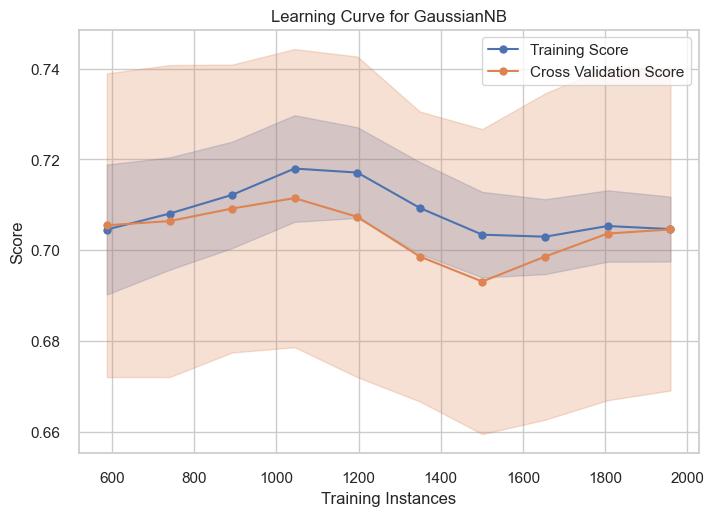

In [225]:
from pycaret.classification import plot_model

# Plot learning curve untuk model regresi
# gbr adalah objek model yang telah dilatih
plot_model(finalmodel, plot='learning')


- it seems that the Naive Bayes (nb) model without hyperparameter tuning is selected based on the 'Recall' metric. Here are some possible reasons for choosing the Naive Bayes model:

- High Recall:

    -The Naive Bayes model achieves the highest 'Recall' among all models (85.56%). This is important, especially in scenarios where capturing as many positive instances (churn) as possible is a priority. High recall minimizes false negatives, meaning fewer actual churn cases are missed.
- Balanced Performance:

    - While the Naive Bayes model has high recall, it also maintains a reasonable balance in other metrics, such as precision, F1 score, and accuracy. Balanced performance is crucial for ensuring that the model generalizes well to unseen data.
- Interpretability:

    - Naive Bayes models are known for their simplicity and interpretability. If interpretability is a priority, a simpler model like Naive Bayes might be preferred over more complex models like ensemble methods.
- Computational Efficiency:

    - Naive Bayes models are computationally efficient and have low training times. If there are constraints on computational resources, the efficiency of Naive Bayes may be advantageous.
- Domain Considerations:

    - Depending on the specific domain and business requirements, certain models may be preferred. Naive Bayes, despite its simplicity, can perform well in scenarios where the independence assumption holds reasonably well.
- No Significant Improvement from Tuning:

    - The hyperparameter tuning process aims to find the best configuration for a model. If the Naive Bayes model's performance is already satisfactory without tuning, and the tuning process doesn't lead to a significant improvement, it may be reasonable to choose the untuned version.
It's important to note that the choice of the best model depends on the specific objectives of the project and the trade-offs between different metrics. In this case, prioritizing high recall with a balanced performance might be a suitable strategy for a churn prediction problem.

### Discriminant Threshold

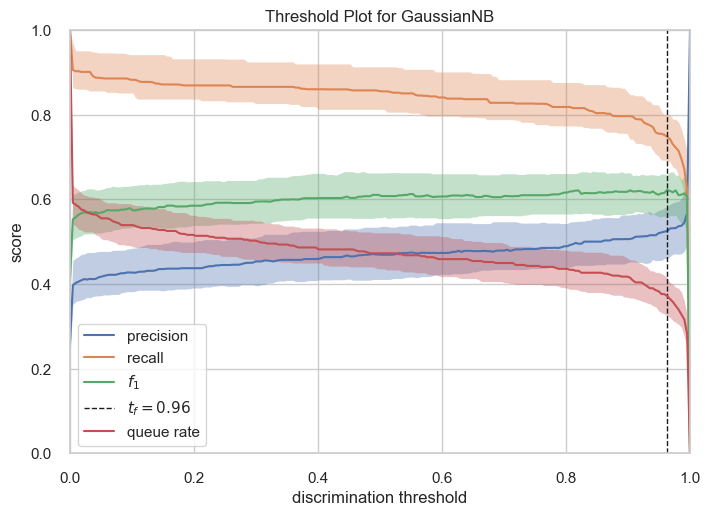

In [226]:
# Discriminant Threshold
plot_model(finalmodel, plot = 'threshold')

- This type of plot is used to visualize the trade-offs between different evaluation metrics as the classification threshold is varied. In a binary classification model, the threshold is the probability or score at which the decision is made whether to classify an instance as positive or negative. Here's an interpretation of the threshold plot in the context of developing a machine learning model:

    - Precision: Precision (blue line) starts very high when the threshold is low, which means the model is very selective, but as the threshold increases, precision declines. This is typical because initially, only the most certain positives are classified as such, which results in high precision. As the threshold increases, more true positives are missed, and more false positives are included.

    - Recall: Recall (green line) starts high and decreases as the threshold increases. This behavior is expected because a lower threshold means more instances are classified as positive, thus capturing more of the actual positives (true positives). As the threshold is raised, fewer instances meet the criteria to be classified as positive, so recall decreases.

    - F1 Score: The F1 score (red line) is the harmonic mean of precision and recall and balances the two metrics. It peaks at a point where the trade-off between precision and recall is balanced. The optimal threshold for F1 may be the point where this line reaches its maximum.

    - Queue Rate: The queue rate (orange line) indicates the proportion of instances classified as positive over the range of thresholds. A low threshold classifies most instances as positive (high queue rate), while a high threshold classifies fewer instances as positive (low queue rate).

    - Optimal Threshold (t_f): The dashed black line represents an optimal threshold point which is set at 0.96, indicating a very conservative model that requires high certainty before classifying an instance as positive. At this threshold, precision is high, but recall is low, indicating that while the positive predictions made are likely to be correct, many positive instances are likely being missed.

    - Model Decision Making: The model's ability to distinguish between classes can be adjusted by moving the threshold. A lower threshold results in a more inclusive model, while a higher threshold results in a more exclusive model.

    - Business Implications: The choice of the threshold should be informed by business objectives and the cost/benefit analysis of false positives versus false negatives. For example, in a medical diagnosis context, a higher recall might be prioritized to ensure all possible positive cases are identified, even at the expense of precision. In a marketing campaign, precision might be more important to ensure resources are only spent on those most likely to respond.

**In conclusion, the threshold plot is a powerful tool for understanding the trade-offs between precision and recall in a classification model, and for selecting an appropriate threshold based on the specific goals and costs associated with the machine learning application. The plot suggests that the GaussianNB model's performance varies significantly with the threshold, and the choice of threshold will have important implications for the model's operation in a real-world setting.**

### Time Complexity

In [227]:
import time

# Menghitung waktu yang diperlukan untuk melatih model
start_time = time.time()
# nb adalah objek model yang telah dilatih
tuned_nb = create_model(finalmodel)
end_time = time.time()
time_taken = end_time - start_time
print(f"Waktu yang diperlukan untuk melatih model Naive Bias: {time_taken} detik")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7156,0.8409,0.8750,0.4712,0.6125,0.4182,0.4684
1,0.6560,0.8095,0.8571,0.4174,0.5614,0.3299,0.3882
2,0.7202,0.8312,0.9107,0.4766,0.6258,0.4353,0.4938
3,0.6651,0.7943,0.8750,0.4261,0.5731,0.3477,0.4092
4,0.7798,0.8799,0.9107,0.5426,0.6800,0.5281,0.5693
5,0.7339,0.8329,0.8214,0.4894,0.6133,0.4297,0.4633
6,0.6927,0.8073,0.8393,0.4476,0.5839,0.3742,0.4208
7,0.7189,0.8389,0.8364,0.4694,0.6013,0.4096,0.4505
8,0.6682,0.7926,0.8727,0.4248,0.5714,0.3497,0.4105


Waktu yang diperlukan untuk melatih model Naive Bias: 1.5914921760559082 detik


The code snippet provided seems to calculate the time taken to train a Naive Bayes model, although there is a small error in the code where finalmodel should probably be replaced with the actual model variable, presumably nb. The output is not shown, but it would print the time taken to train the model in seconds.

From the provided table, which appears to be the cross-validation results of the Naive Bayes model, we can infer several points regarding the model's performance and its training time complexity:

- Model Performance Variability: There is some variation in the model's performance across different folds. The accuracy ranges from around 0.6560 to 0.7798, and similar variations are observable in other metrics like AUC, Recall, Precision, F1 Score, Kappa, and MCC. This variation is natural in cross-validation due to the model being trained and validated on different subsets of the data.

- High Recall: The model consistently shows high recall across all folds (mean recall is 0.8544), which indicates that it is quite good at identifying positive cases. This is a desirable trait if the cost of missing positive cases is high (e.g., in fraud detection or disease screening).

- Moderate Precision and F1 Score: The precision and F1 scores are moderate (mean precision is 0.4606 and mean F1 is 0.5977), suggesting a trade-off between recall and precision. The model may be classifying too many instances as positive, which, while ensuring high recall, decreases precision.

- Training Time Complexity: Without the actual output of the time_taken, it's not possible to provide specific insights into the time complexity of training the Naive Bayes model. However, Naive Bayes is generally known for being a fast algorithm due to its simple calculations and the assumption of feature independence.

- Standard Deviation: The standard deviation for accuracy and other metrics is relatively small, indicating that the model's performance is reasonably stable across different iterations of cross-validation. This stability is a good sign and suggests that the model is not particularly sensitive to the specific samples included in each fold.

- Overall Model Suitability: Considering the high recall and the moderate precision and F1 scores, this model may be suitable for applications where it's more critical to identify all possible positive instances rather than to be highly confident in each individual prediction. This could apply in initial screening applications where false positives are later filtered out through more rigorous methods.

**In conclusion, the Naive Bayes model seems to provide a good balance between speed and performance, with a strong emphasis on high recall. The training time, which we assume to be quick given the nature of the algorithm, makes it a practical choice for applications where a fast model training is required, and the cost of false negatives is higher than that of false positives.**

### Validation

In [229]:
# Test the model using seen data

result_seen = predict_model(finalmodel)
result_seen.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.6916,0.8086,0.8075,0.4437,0.5727,0.3620,0.4018


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn,prediction_label,prediction_score
1467,Yes,52,Yes,No,Fiber optic,Yes,Yes,Month-to-month,Yes,84.050003,0,0,0.9666
4534,Yes,50,No,No,DSL,Yes,Yes,One year,Yes,69.650002,0,0,0.9748
3442,No,10,No,No,Fiber optic,No,Yes,Month-to-month,Yes,98.500000,1,1,0.9994
305,Yes,7,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.450001,0,0,1.0000
1395,No,11,No,No,DSL,Yes,No,Month-to-month,No,53.750000,1,1,0.9960


In summary, the Naive Bayes model is performing moderately well on the seen data, with a good ability to identify positive cases but at the expense of misclassifying some negative cases as positive. The model's performance is decent, but there is certainly room for improvement, especially in terms of precision. This could potentially be addressed through additional feature engineering, hyperparameter tuning, or by exploring different modeling approaches.

### Test Model to Unseen Data

In [230]:
# Test the model using unseen data
result_unseen = predict_model(finalmodel, data=unseen)
result_unseen.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.6915,0.8056,0.8429,0.4609,0.5960,0.3794,0.4248


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn,prediction_label,prediction_score
1285,No,54,No,Yes,Fiber optic,Yes,Yes,Month-to-month,No,111.099998,1,0,0.7135
3753,No,24,No,Yes,DSL,No,No,Month-to-month,Yes,49.700001,0,1,0.9983
1560,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,89.250000,0,1,1.0000
1843,No,68,No internet service,No internet service,No,No internet service,No internet service,Two year,Yes,24.950001,0,0,1.0000
3834,Yes,32,No,No,Fiber optic,Yes,No,Month-to-month,Yes,91.349998,0,1,0.9936


# Conclusion & Recommendation

### Conclusion

### Recommendation

# Deployment